In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')


In [ ]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving NFLX.csv to NFLX.csv


In [ ]:
df = pd.read_csv("NFLX.csv")
df.head(30)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-18,355.000000,360.410004,351.640015,360.350006,360.350006,8353200
1,2019-04-22,359.700012,377.690002,359.000000,377.339996,377.339996,11980500
2,2019-04-23,375.450012,384.799988,374.709991,381.890015,381.890015,10089800
3,2019-04-24,381.070007,381.899994,373.269989,374.230011,374.230011,6541900
4,2019-04-25,374.489990,374.760010,365.700012,368.329987,368.329987,6255500
5,2019-04-26,368.350006,375.140015,366.239990,374.850006,374.850006,5621900
6,2019-04-29,373.679993,374.579987,369.119995,371.829987,371.829987,3821700
7,2019-04-30,369.559998,374.500000,368.350006,370.540009,370.540009,3870100
8,2019-05-01,374.000000,385.989990,373.170013,378.809998,378.809998,9257300
9,2019-05-02,378.000000,383.500000,374.510010,379.059998,379.059998,5398200


In [ ]:
# get the number of trading days
df.shape

#tail of data
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
247,2020-04-13,371.309998,400.510010,367.700012,396.720001,396.720001,11692900
248,2020-04-14,397.500000,417.820007,394.850006,413.549988,413.549988,11581000
249,2020-04-15,413.000000,434.980011,412.250000,426.750000,426.750000,13561200
250,2020-04-16,437.000000,449.519989,431.609985,439.170013,439.170013,16128700
251,2020-04-17,431.000000,432.000000,414.700012,422.959991,422.959991,12616300


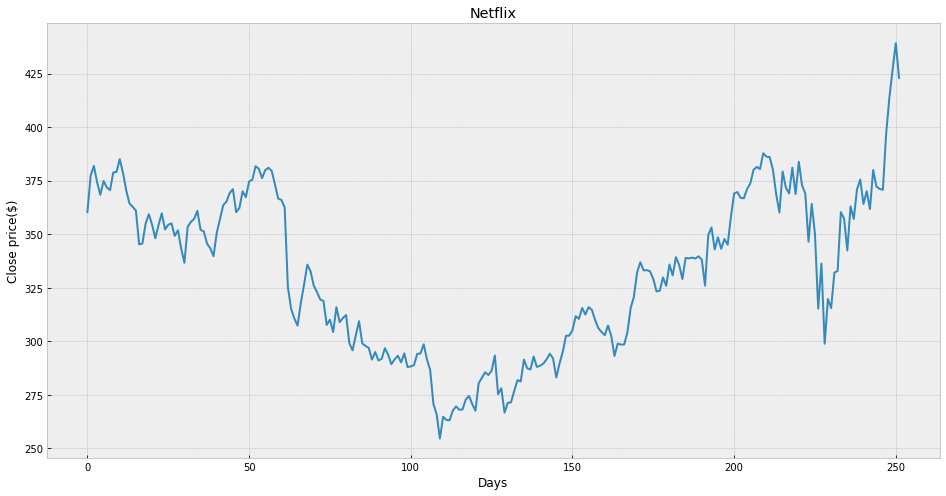

In [ ]:
# visualise the close price data
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close price($)')
plt.plot(df['Close'])
plt.show()

In [ ]:
# get the close price
df = df[['Close']]
df.head(4)

,Close
0,360.350006
1,377.339996
2,381.890015
3,374.230011


In [ ]:
# create a variable to predict 'x' days out into the future
future_days = 25
#create a new column (target) shifted 'x' units/day up
df['prediction'] = df[['Close']].shift(-future_days) #'Close' value got shifted by +25
print(df.head(4))

print(df.tail(30))

#in the last 25 days we don't have any prediction value

        Close  prediction
0  360.350006  354.390015
1  377.339996  355.059998
2  381.890015  349.190002
3  374.230011  351.850006
          Close  prediction
222  368.970001  396.720001
223  346.489990  413.549988
224  364.130005  426.750000
225  349.920013  439.170013
226  315.250000  422.959991
227  336.299988         NaN
228  298.839996         NaN
229  319.750000         NaN
230  315.470001         NaN
231  332.029999         NaN
232  332.829987         NaN
233  360.269989         NaN
234  357.320007         NaN
235  342.390015         NaN
236  362.989990         NaN
237  357.119995         NaN
238  370.959991         NaN
239  375.500000         NaN
240  364.079987         NaN
241  370.079987         NaN
242  361.760010         NaN
243  379.959991         NaN
244  372.279999         NaN
245  371.119995         NaN
246  370.720001         NaN
247  396.720001         NaN
248  413.549988         NaN
249  426.750000         NaN
250  439.170013         NaN
251  422.959991         NaN


In [ ]:
# createe the feature dataset(X) and convert it to a numpy array and remove the last 'x' rows/days

X = np.array(df.drop(['prediction'],1))[:-future_days]

#we dropped prediction column and we only want all of the rows except last 'x' days

In [ ]:
print(X)

[[360.350006]
 [377.339996]
 [381.890015]
 [374.230011]
 [368.329987]
 [374.850006]
 [371.829987]
 [370.540009]
 [378.809998]
 [379.059998]
 [385.029999]
 [378.670013]
 [370.459991]
 [364.369995]
 [362.75    ]
 [361.040009]
 [345.26001 ]
 [345.609985]
 [354.98999 ]
 [359.309998]
 [354.450012]
 [348.109985]
 [354.269989]
 [359.730011]
 [352.209991]
 [354.390015]
 [355.059998]
 [349.190002]
 [351.850006]
 [343.279999]
 [336.630005]
 [353.399994]
 [355.730011]
 [357.130005]
 [360.869995]
 [352.01001 ]
 [351.269989]
 [345.559998]
 [343.429993]
 [339.730011]
 [350.619995]
 [357.119995]
 [363.519989]
 [365.209991]
 [369.209991]
 [371.040009]
 [360.299988]
 [362.200012]
 [370.019989]
 [367.320007]
 [374.600006]
 [375.429993]
 [381.720001]
 [380.549988]
 [376.160004]
 [379.929993]
 [381.      ]
 [379.5     ]
 [373.25    ]
 [366.600006]
 [365.98999 ]
 [362.440002]
 [325.209991]
 [315.100006]
 [310.619995]
 [307.299988]
 [317.940002]
 [326.459991]
 [335.779999]
 [332.700012]
 [325.929993]
 [322.

In [ ]:
#Create the target data set (y) and convert it to a numpy array and get all of the target values except the last 'x' rows

y = np.array(df['prediction'])[:-future_days]
print(y)

[354.390015 355.059998 349.190002 351.850006 343.279999 336.630005
 353.399994 355.730011 357.130005 360.869995 352.01001  351.269989
 345.559998 343.429993 339.730011 350.619995 357.119995 363.519989
 365.209991 369.209991 371.040009 360.299988 362.200012 370.019989
 367.320007 374.600006 375.429993 381.720001 380.549988 376.160004
 379.929993 381.       379.5      373.25     366.600006 365.98999
 362.440002 325.209991 315.100006 310.619995 307.299988 317.940002
 326.459991 335.779999 332.700012 325.929993 322.98999  319.5
 318.829987 307.630005 310.100006 304.290009 315.899994 308.929993
 310.829987 312.279999 299.109985 295.76001  302.799988 309.380005
 298.98999  297.809998 296.929993 291.440002 294.980011 291.029999
 291.769989 296.779999 293.75     289.290009 291.519989 293.25
 290.170013 294.339996 287.98999  288.269989 288.859985 294.149994
 294.290009 298.600006 291.559998 286.600006 270.75     265.920013
 254.589996 264.75     263.309998 263.079987 267.619995 269.579987
 268.

In [ ]:
#Splitting the data into training and test set
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.5)

In [ ]:
# create the model
#create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train,y_train)

#create the linear regression model
lr = LinearRegression().fit(x_train,y_train)


In [ ]:
#Get the last 'x' rows of feature dataset
x_future = df.drop(['prediction'],1)[:-future_days]  #we want all rows except the last x rows
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
print(x_future)

[[366.950012]
 [366.769989]
 [371.070007]
 [373.690002]
 [380.01001 ]
 [381.399994]
 [380.399994]
 [387.779999]
 [386.190002]
 [386.      ]
 [380.070007]
 [368.700012]
 [360.089996]
 [379.23999 ]
 [371.709991]
 [369.029999]
 [381.049988]
 [368.769989]
 [383.790009]
 [372.779999]
 [368.970001]
 [346.48999 ]
 [364.130005]
 [349.920013]
 [315.25    ]]


In [ ]:
## SHow the decision tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[335.779999 335.779999 319.75     351.850006 312.279999 332.829987
 360.269989 342.390015 342.390015 342.390015 312.279999 370.959991
 375.5      364.079987 319.75     349.920013 332.829987 372.279999
 315.899994 370.720001 396.720001 363.519989 335.779999 439.170013
 422.959991]

[357.15825918 357.03657934 359.94301628 361.71390427 365.98567817
 366.92518606 366.24927333 371.23751271 370.16281348 370.03438871
 366.02623091 358.34110647 352.52148699 365.46521185 360.37558961
 358.56414888 366.68861255 358.38840481 368.54062764 361.09882165
 358.52359547 343.32906971 355.25218053 345.64746594 322.21356255]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


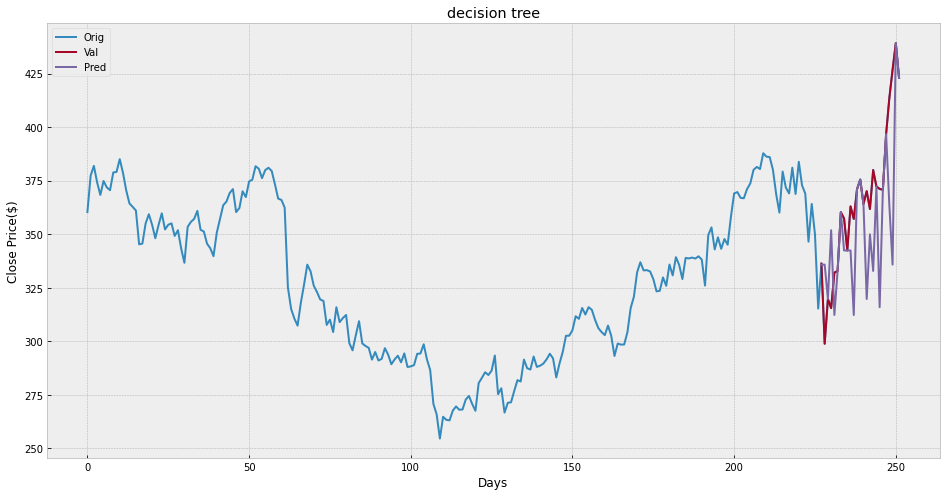

In [ ]:
#plotting the data

Prediction = tree_prediction

test = df[X.shape[0]:]
test['Prediction'] = Prediction

plt.figure(figsize=(16,8))
plt.title("decision tree")
plt.xlabel("Days")
plt.ylabel("Close Price($)")
plt.plot(df['Close'])
plt.plot(test[['Close','Prediction']])
plt.legend(['Orig','Val','Pred'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


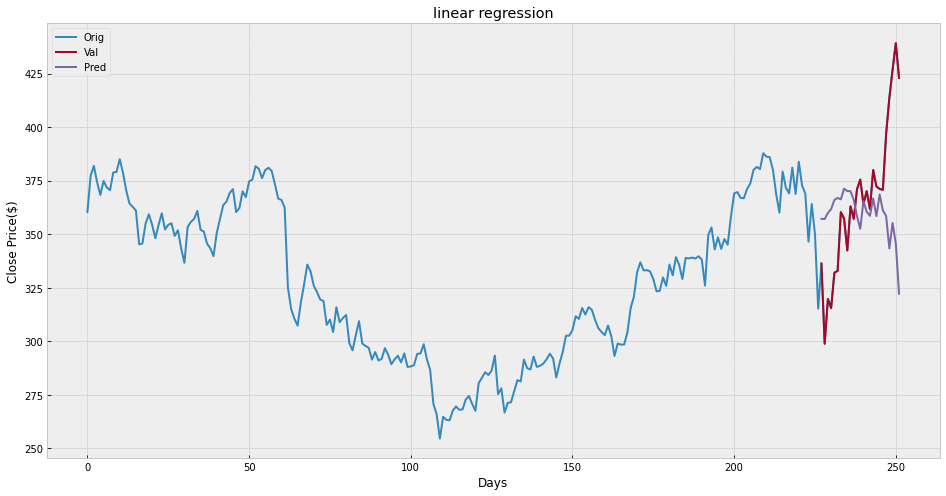

In [ ]:
#visualise the plot
prediction = lr_prediction
test = df[X.shape[0]:]

test['pr'] = prediction

plt.figure(figsize=(16,8))
plt.title('linear regression')
plt.xlabel("Days")
plt.ylabel("Close Price($)")
plt.plot(df['Close'])
plt.plot(test[['Close','pr']])
plt.legend(['Orig','Val','Pred'])

fatal: not a git repository (or any of the parent directories): .git
